### 회귀 실습
- 간단하게 성적데이터 구성하여 맛보기 실습해보자

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.DataFrame([[2,20],[4,40],[8,80],[9,90]], index=['창규','동익','민수','혜나'],
                   columns = ['시간','성적'])
data

,시간,성적
창규,2,20
동익,4,40
민수,8,80
혜나,9,90


#### 1. 수학 공식을 이용한 해석적 모델
- LinearRegression

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
# 회귀 모델 생성
linear_model = LinearRegression()

In [11]:
# 모델 학습
# 모델.fit(문제,답)

# 문제는 2차원으로 넣어야함
data[['시간']] # 문제
# data.loc[[:,'시간']] = data.iloc[[:,0]] 둘중에 하나도 됨

# 답 - 성적
data['성적'] # 답

linear_model.fit(data[['시간']],data['성적'])
         

LinearRegression()

- y = 10x+b 공식 확인

In [12]:
# a : w , 가중치 , 계수 , 기울기 
# b : 절편, 편향, 함수의(직선의) 좌우 이동값
print('가중치 : ', linear_model.coef_)
print('절편 : ', linear_model.intercept_)

가중치 :  [10.]
절편 :  7.105427357601002e-15


선형 모델이 생성한 함수를 가지고 예측진행

In [14]:
# 경고창 무시 import warnings
import warnings
warnings.filterwarnings(action='ignore')
#action : 함수안의 매개변수를 뜻함

linear_model.predict([[7]]) # 특성의 개수 -> X_train 2차원 

array([70.])

#### 2. 경사하강법
 - 가중치(w)변화에 따른 비용함수(cost)값의 변화 그래프

#### H(x) 가설설정 함수 만들기

In [16]:
def h(w,x):
    return w*x+0

#### Cost Function

In [17]:
# 비용함수 => MSE ( Mean Squared Error ) 평균제곱오차
def cost(data, target, weight):
    y_pre = h(weight, data) # 예측값
    return ((y_pre - target) **2).mean()# cost값  # 참고 = 제곱 : ** 임

In [18]:
cost(data['시간'], data['성적'], 10) # 결과는 오차임 10일 경우 오차가 0이됨

0.0

In [19]:
cost(data['시간'], data['성적'], 15)

1031.25

In [20]:
cost(data['시간'], data['성적'], 7)

371.25

In [21]:
cost(data['시간'], data['성적'], 8)

165.0

In [22]:
cost(data['시간'], data['성적'], 9)

41.25

In [23]:
cost(data['시간'], data['성적'], 10)

0.0

In [24]:
weight_range = range(-10,31) # -10부터 30까지 

In [26]:
cost_list = [] # 가중치값 변동할 때마다 발생하는 오차 저장
for w in weight_range: # w 는 가중치 
    error = cost(data['시간'],data['성적'], w) # 오차,잔차,에러 라고 부름
    cost_list.append(error)
cost_list

[16500.0,
 14891.25,
 13365.0,
 11921.25,
 10560.0,
 9281.25,
 8085.0,
 6971.25,
 5940.0,
 4991.25,
 4125.0,
 3341.25,
 2640.0,
 2021.25,
 1485.0,
 1031.25,
 660.0,
 371.25,
 165.0,
 41.25,
 0.0,
 41.25,
 165.0,
 371.25,
 660.0,
 1031.25,
 1485.0,
 2021.25,
 2640.0,
 3341.25,
 4125.0,
 4991.25,
 5940.0,
 6971.25,
 8085.0,
 9281.25,
 10560.0,
 11921.25,
 13365.0,
 14891.25,
 16500.0]

#### 가중치 변동에 따른 error 시각화

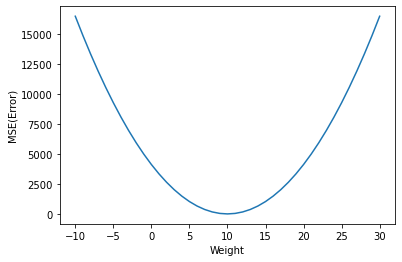

In [28]:
plt.plot(weight_range, cost_list)
plt.xlabel('Weight')
plt.ylabel('MSE(Error)')
plt.show()

- SGDRegressor 사용하기

In [29]:
from sklearn.linear_model import SGDRegressor # 경사하강법

In [41]:
sgd_model = SGDRegressor(max_iter = 5000, # w 갱신 업데이트 횟수
                        eta0 = 0.001,# 학습률(Learning_rate)
                        verbose = 1) # 1 True 학습과정 출력 
# verbose는 학습의 진행 상황을 보여줄 것인지 지정을 하는데 verbose를 1로 세팅하면 학습이 되는 모습을 볼 수 있다.


In [42]:
# 모델 학습
sgd_model.fit(data[['시간']],data[['성적']])

-- Epoch 1
Norm: 1.40, NNZs: 1, Bias: 0.188394, T: 4, Avg. loss: 1872.600549
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.24, NNZs: 1, Bias: 0.306665, T: 8, Avg. loss: 1422.999621
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.94, NNZs: 1, Bias: 0.402747, T: 12, Avg. loss: 1161.121261
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 3.51, NNZs: 1, Bias: 0.482778, T: 16, Avg. loss: 962.115137
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 4.01, NNZs: 1, Bias: 0.552072, T: 20, Avg. loss: 811.247925
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 4.44, NNZs: 1, Bias: 0.612808, T: 24, Avg. loss: 688.877891
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 4.83, NNZs: 1, Bias: 0.666701, T: 28, Avg. loss: 590.599912
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 5.18, NNZs: 1, Bias: 0.715052, T: 32, Avg. loss: 508.545569
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 5.50, NNZs: 1, Bias: 0.758545, T: 36, Avg. loss: 440.731401
Total training time: 0.00 

SGDRegressor(eta0=0.001, max_iter=5000, verbose=1)

In [43]:
# 예측 코드
# 모델.predict(7시간)
sgd_model.predict([[7]])

array([69.8830446])

In [46]:
# 가중치 확인 
print('가중치 : ', sgd_model.coef_)
# 절편 확인
print('절편 : ', sgd_model.intercept_)
# y = 9.79383312x + 1.32621275

가중치 :  [9.79383312]
절편 :  [1.32621275]


In [47]:
# 모델 평가
# score( 문제 , 답 )
# data를 테스트로 연결
sgd_model.score(data[['시간']], data['성적'])

# 회귀 성능 지표 : R2_score, R-Squared 99%
# 오차가 적은 상태이기 때문
# 분류 성능 지표 : accuracy_score , model.score() 정확도

0.9995507549747388

지도학습 - 회귀예측
* 예측치 (연속적인 값)

회귀예측은 선형 모델로 함!
- 데이터 포인트를 가장 잘 설명할 수 있는 직선을 긋는 것

선형 함수 모델 : 어떤 것이 좋은 모델인가?
- 비용함수 : 가설 검증하는 공식
cost : mse 공식 ( 평균제곱오차 )
오차 값이 가장 작을 때 최적의 직선
=> 최적의 선형 함수 모델

가설을 만듬 - > 새로운 a,b로 변경하는 것 (경사하강)
 - ax + b =y 
 10x + 0
 11x + 1
 9x + 5 

==선형 모델 정리==
-모든 선형모델은 회귀에만 사용할까요? x , 분류용 선형모델도 존재
* 기본적으로 선형회귀모델 => 회귀예측
* 선형분류모델 => 분류값 출력

LinearRegressor => 선형회귀모델 (연속적인 값을 출력(예측))
1. 선형 회귀모델의 핵심
- 좋은 선형모델을 만들어야함 == 예측 잘하는 모델 만들기
how ? 오차가 적은것, 데이터 포인트들을 가장 잘 표현하는 선
오차 계산 ? COST(LOSS) 함수 - 비용함수, 손실함수 => MSE
MEE => 평균제곱오차 (오차계산) -> 오차가 적을 때가 최적이다!! 좋은 모델!!

여러개의 가설 설정
y = ax + b
a, b를 갱신 => 경사하강법 (편미분을 하면서 순간의 기울기 계산)
	       하이퍼파라미터 => 학습률 Learning_rate
	       가중치 갱신 변동폭 설정